In [ ]:
#Importing modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestRegressor


#Reading the Dataset
import pandas as pd
df=pd.read_csv('C:\\Users\\GPT BANTWAL\\Downloads\\AABA_2006-01-01_to_2018-01-01.csv')
df

In [86]:
#check the five columns
df.head()

Date   Open   High    Low  Close    Volume  Name
0  2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA
1  2006-01-04  41.22  41.90  40.77  40.97  20553479  AABA
2  2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA
3  2006-01-06  42.88  43.57  42.80  43.21  29422828  AABA
4  2006-01-09  43.10  43.66  42.82  43.42  16268338  AABA

In [87]:
df.shape

(3019, 7)

In [88]:
#Check the missing value
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [89]:
df.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
Name      False
dtype: bool

In [90]:
#Checking the information Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [91]:
df.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     28.426479    28.766532    28.066558    28.412726  2.158391e+07
std      13.257242    13.356692    13.157326    13.258163  1.926231e+07
min       9.100000     9.480000     8.940000     8.950000  1.939061e+06
25%      16.175000    16.385000    15.970000    16.130000  1.248025e+07
50%      27.180000    27.490000    26.820000    27.100000  1.732130e+07
75%      36.655000    37.035000    36.305000    36.635000  2.512757e+07
max      73.020000    73.250000    72.460000    72.930000  4.382317e+08

In [92]:
print('lenghth of dataset:',len(df))

lenghth of dataset: 3019


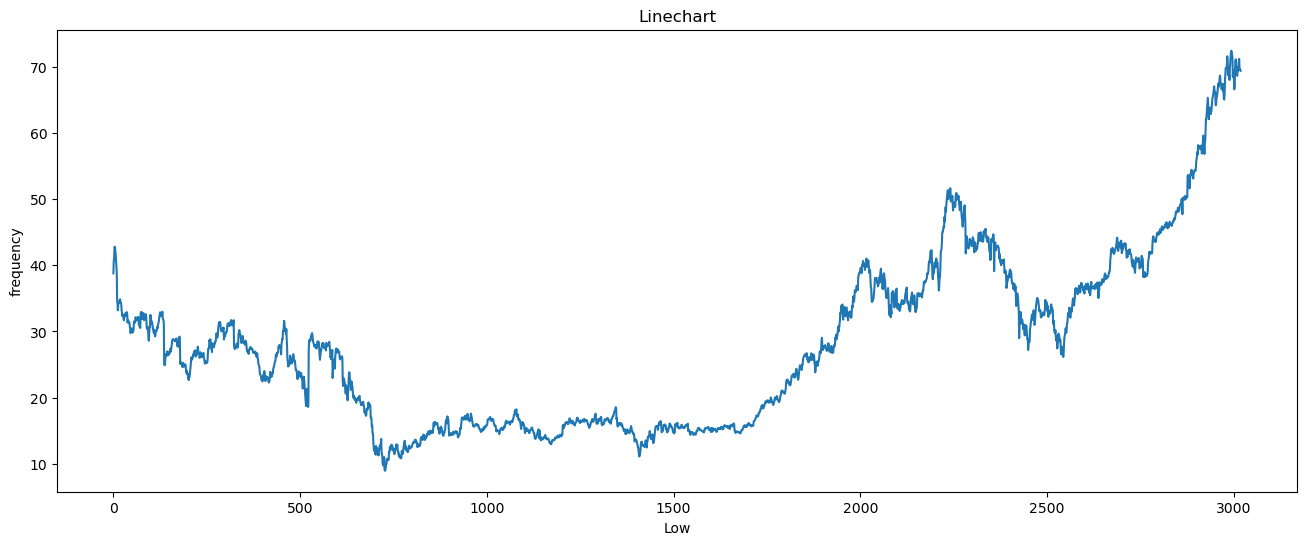

In [119]:
#Linegraph for stock Time Series
import matplotlib.pyplot as plt
df['Low'].plot(figsize=(16,6))
plt.title('Linechart')
plt.xlabel('Low')
plt.ylabel('frequency')
plt.show()

In [94]:
x=df.drop(['Open','Date','Name'],axis=1)
x

High    Low  Close    Volume
0     41.22  38.79  40.91  24232729
1     41.90  40.77  40.97  20553479
2     41.73  40.85  41.53  12829610
3     43.57  42.80  43.21  29422828
4     43.66  42.82  43.42  16268338
...     ...    ...    ...       ...
3014  71.87  71.22  71.58  10979165
3015  71.39  69.63  69.86   8542802
3016  70.49  69.69  70.06   6345124
3017  70.32  69.51  69.82   7556877
3018  70.13  69.43  69.85   6613070

[3019 rows x 4 columns]

In [95]:
y=df['Open']
y

0       39.69
1       41.22
2       40.93
3       42.88
4       43.10
        ...  
3014    71.42
3015    70.94
3016    69.77
3017    70.12
3018    69.79
Name: Open, Length: 3019, dtype: float64

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2264, 4)
(755, 4)
(2264,)
(755,)


In [97]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [98]:
print(regressor.coef_)

[ 9.27678987e-01  7.13321001e-01 -6.42281528e-01  1.28298150e-10]


In [99]:
print(regressor.intercept_)

-0.03273064649854618


In [100]:
#Prediction
predicted=regressor.predict(x_test)
predicted

array([18.94156693, 28.08784436, 36.72956729, 35.43734501, 14.1059279 ,
       14.10945378, 38.96088739, 16.02567605, 35.71267415, 14.12940561,
       19.54393858, 16.19957973, 39.09746915, 41.26741222, 15.00133956,
       34.44711463, 15.9754882 , 33.47338474, 29.43540676, 19.55269355,
       15.51517329, 15.27931439, 17.33663174, 66.46795718, 37.66659559,
       68.21020041, 28.2272732 , 58.1573571 , 14.28440361, 28.27459167,
       19.58643552, 50.79270422, 30.8082673 , 13.16885126, 25.39496142,
       16.44719317, 15.21390056, 36.69709583, 14.28457383, 27.12728944,
       36.66978972, 15.7044378 , 14.89457693, 25.90325873, 70.59740116,
       15.81111125, 28.92979228, 17.42696518, 15.38181916, 15.10575448,
       33.74186058, 29.01527468, 21.90815297, 43.50084475, 39.66693881,
       16.62177443, 50.27324349, 31.96168564, 22.93758932, 32.0963884 ,
       42.13475627, 29.16833939, 17.2484571 , 49.27558071, 32.89978082,
       14.29516489, 30.85307548, 16.92030397, 17.50877853, 21.08

In [101]:
print(x_test)

       High    Low  Close    Volume
663   19.18  18.86  19.11  16995734
156   28.46  27.97  28.39  12589452
2620  37.22  36.58  37.15  12179259
2422  35.67  35.02  35.19   8976684
1158  14.20  13.84  13.87  13243119
...     ...    ...    ...       ...
405   24.70  23.69  23.72  18709661
1044  15.41  15.16  15.31  14975622
57    32.08  31.30  31.45  14862989
1273  16.19  15.85  16.02  26673037
731   10.58   9.92  10.58  13654705

[755 rows x 4 columns]


In [102]:
predicted.shape

(755,)

In [103]:
dframe=pd.DataFrame(y_test,predicted)
dframe

Open
18.941567   NaN
28.087844   NaN
36.729567   NaN
35.437345   NaN
14.105928   NaN
...         ...
24.546997   NaN
15.245340   NaN
31.856311   NaN
16.006602   NaN
10.064671   NaN

[755 rows x 1 columns]

In [104]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':predicted})
dfr

Actual Price  Predicted Price
663          19.06        18.941567
156          28.35        28.087844
2620         36.66        36.729567
2422         35.67        35.437345
1158         14.14        14.105928
...            ...              ...
405          24.69        24.546997
1044         15.27        15.245340
57           31.84        31.856311
1273         16.17        16.006602
731           9.93        10.064671

[755 rows x 2 columns]

In [105]:
dfr.head(60)

Actual Price  Predicted Price
663          19.06        18.941567
156          28.35        28.087844
2620         36.66        36.729567
2422         35.67        35.437345
1158         14.14        14.105928
1129         13.95        14.109454
2063         39.00        38.960887
1276         16.15        16.025676
10           35.01        35.712674
1187         14.19        14.129406
1783         19.49        19.543939
1661         16.15        16.199580
2761         39.08        39.097469
2378         40.80        41.267412
1449         14.66        15.001340
2115         34.69        34.447115
1505         16.05        15.975488
2106         33.41        33.473385
2448         29.66        29.435407
1759         19.43        19.552694
1529         15.54        15.515173
1041         15.45        15.279314
933          17.00        17.336632
2944         66.26        66.467957
2175         37.76        37.666596
2961         67.85        68.210200
572          28.18        28.227273
2905         58.46        58.157357
924          14.36        14.284404
227          27.50        28.274592
1765         19.73        19.586436
2246         51.03        50.792704
289          30.86        30.808267
746          13.13        13.168851
1881         25.22        25.394961
1055         16.35        16.447193
1043         15.32        15.213901
2602         36.55        36.697096
1199         14.21        14.284574
385          26.74        27.127289
2579         36.70        36.669790
1691         15.76        15.704438
1670         14.95        14.894577
252          25.64        25.903259
2999         69.80        70.597401
1386         15.78        15.811111
536          28.76        28.929792
958          17.54        17.426965
1599         15.40        15.381819
1374         14.66        15.105754
22           34.00        33.741861
2453         28.62        29.015275
621          22.07        21.908153
2708         43.64        43.500845
2400         39.98        39.666939
1716         16.72        16.621774
2870         50.60        50.273243
2457         31.79        31.961686
618          23.22        22.937589
316          32.01        32.096388

In [106]:
from sklearn.metrics import confusion_matrix,accuracy_score
train_accuracy=regressor.score(x_train,y_train)
print('train_accuracy:',train_accuracy)
test_accuracy=regressor.score(x_test,y_test)
print('test_accuracy:',test_accuracy)

train_accuracy: 0.9996997796528104
test_accuracy: 0.99970159484399


In [107]:
import math
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.1668367985237174
Mean Squared Error: 0.05120571656577919
Root Mean Squared Error: 0.22628680157220657


In [108]:
graph=dfr.head(20)
graph

Actual Price  Predicted Price
663          19.06        18.941567
156          28.35        28.087844
2620         36.66        36.729567
2422         35.67        35.437345
1158         14.14        14.105928
1129         13.95        14.109454
2063         39.00        38.960887
1276         16.15        16.025676
10           35.01        35.712674
1187         14.19        14.129406
1783         19.49        19.543939
1661         16.15        16.199580
2761         39.08        39.097469
2378         40.80        41.267412
1449         14.66        15.001340
2115         34.69        34.447115
1505         16.05        15.975488
2106         33.41        33.473385
2448         29.66        29.435407
1759         19.43        19.552694

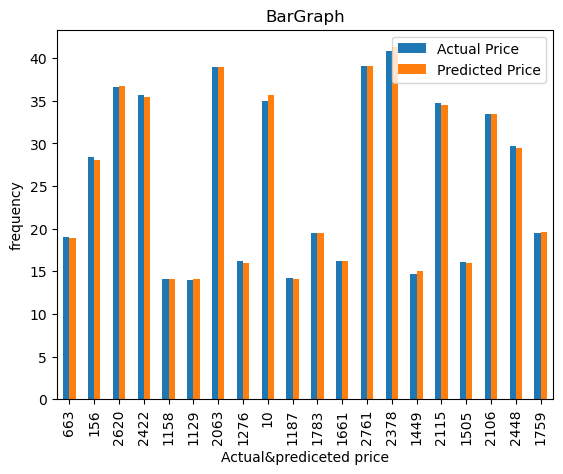

In [109]:
#plotting the bargraph to check difference between actualprice and predicted price  
graph.plot(kind='bar')
plt.title('BarGraph')
plt.xlabel('Actual&prediceted price')
plt.ylabel('frequency')
plt.show()

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.90,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(301, 4)
(2718, 4)
(301,)
(2718,)


In [111]:
#Model trainning
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [112]:
predicted=regressor.predict(x_test)
predicted

array([13.7766, 38.2418, 15.8619, ..., 16.5886, 34.6212, 37.8665])

In [113]:
#Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score
train_accuracy=regressor.score(x_train,y_train)
print('train_accuracy:',train_accuracy)
R_test_accuracy=regressor.score(x_test,y_test)
print('test_accuracy:',R_test_accuracy)

train_accuracy: 0.9998790325024732
test_accuracy: 0.9990075753547575


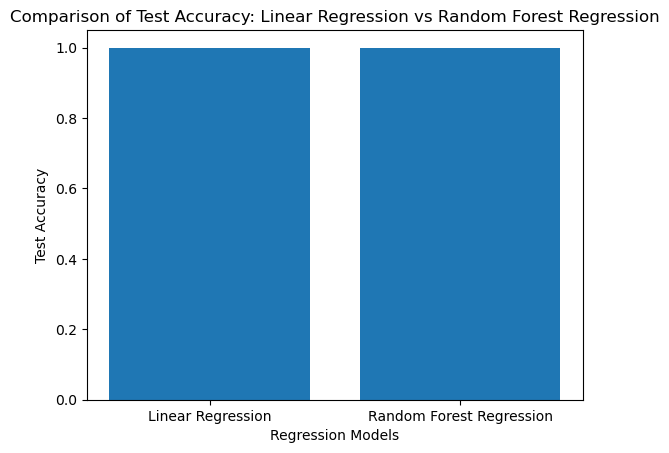

In [114]:
#Linear and Randomforestregression using bar plot
import matplotlib.pyplot as plt
linear_regression_accuracy =  0.999700039585113
random_forest_accuracy = 0.998957807027415
accuracy_scores = [linear_regression_accuracy, random_forest_accuracy]
model_names = ['Linear Regression', 'Random Forest Regression']
plt.bar(model_names, accuracy_scores)
plt.xlabel('Regression Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy: Linear Regression vs Random Forest Regression')
plt.show()